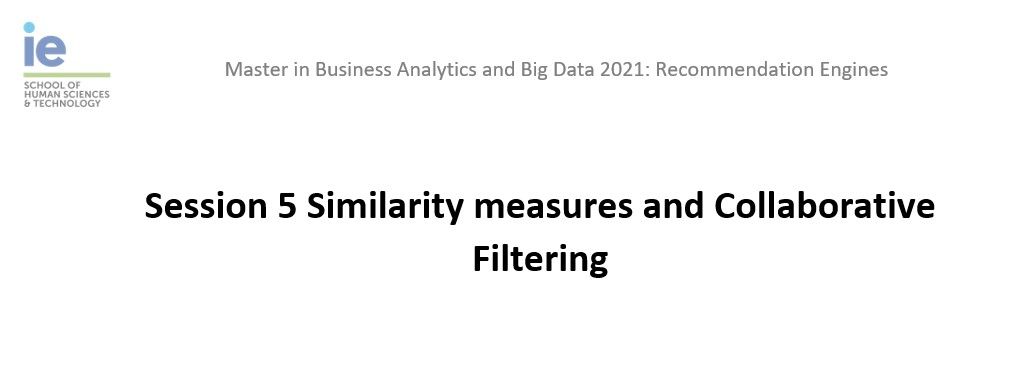

# Similarities 

In our previous session we covered how to measure similarities among users or items. In this section we are going to put that in practice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movielens = pd.read_csv('C:\\Users\\nicol\\OneDrive\\Escritorio\\IE\MBD II\\Term 2\\Recommendation Systems\\ml-latest-small\\ratings.csv')
movielens_meta = pd.read_csv('C:\\Users\\nicol\\OneDrive\\Escritorio\\IE\\MBD II\\Term 2\\Recommendation Systems\\ml-latest-small\\movies.csv')
data = movielens.merge(movielens_meta,on='movieId', how='left')
rat_mat = data.pivot_table(index='userId',columns='title',values='rating')
rat_mat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can select a specific user by using the following:

In [4]:
rat_mat.loc[53]

title
'71 (2014)                                  NaN
'Hellboy': The Seeds of Creation (2004)     NaN
'Round Midnight (1986)                      NaN
'Salem's Lot (2004)                         NaN
'Til There Was You (1997)                   NaN
                                             ..
eXistenZ (1999)                             NaN
xXx (2002)                                  NaN
xXx: State of the Union (2005)              NaN
¡Three Amigos! (1986)                       NaN
À nous la liberté (Freedom for Us) (1931)   NaN
Name: 53, Length: 9719, dtype: float64

## Exercise
Select two users such as their rating mean and variance are really different. What is the problem you can spot about having such differences? 

In [60]:
#Your code here
def var_user(user):
    return np.var(user,ddof=0)

def mean_user(user):
    return np.mean(user)

var_rating = data.pivot_table(
    index = 'userId',
    values = 'rating',
    aggfunc= var_user,
    margins=True,
    margins_name = 'var',
    dropna = False
).sort_values('rating')

mean_rating = data.pivot_table(
    index = 'userId',
    values = 'rating',
    aggfunc= mean_user,
    margins=True,
    margins_name = 'var',
    dropna = False
).sort_values('rating')

mean_var = var_rating.merge(mean_rating,on='userId', how='left')

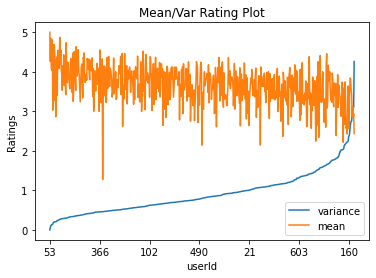

In [97]:
# Graph perspective of user's rating and variance

mean_var.plot(ylabel='Ratings',title='Mean/Var Rating Plot');
plt.legend(['variance', 'mean']);


In [7]:
user_53 = rat_mat.loc[53]
user_160 = rat_mat.loc[160]

print('\033[4m'+'\033[1m'+'User 53:'+'\033[0m'+'\033[0m')
print('Mean Rating:',mean_user(user_53))
print('Variance in Rating:', var_user(user_53))
print('Number of rated movies:',user_53.count())
print(" ")
print('\033[4m'+'\033[1m'+'User 160:'+'\033[0m'+'\033[0m')
print('Mean Rating:', mean_user(user_160))
print('Variance in Rating:', var_user(user_160))
print('Number of rated movies:',user_160.count())


User 53:
Mean Rating: 5.0
Variance in Rating: 0.0
Number of rated movies: 20
 
User 160:
Mean Rating: 2.708237986270023
Variance in Rating: 2.3856987259712334
Number of rated movies: 437


**Explanation**

By looking at the plot we identified user 53 and user 160 as two completely different users where, user 53 only puts 5 stars when he rates a movie - whereas user 160 is more critical and on average rates movies at 2.7 but with a strong variation on how he grades. This creates the problem of dealing with tough and generous raters in a recommender system.

Dealing with tough and generous raters causes a problem when leveraging the different perspectives. In this case both user 53 and user 160 might think of a movie as excellent but only user 53 will rate it 5 stars. Consequently, if the distance between both perspectives is not harmonized the recommendation engine could end either downgrading excellent movies or promoting others that are not great. 


## Exercise
What could we do for solving our previous problem? Please code a solution and explain it.

In [8]:
#For this approach we will build a weighted matrix for the ratings at a movie level and also at a user level

# Movie Level Weighted Ratings 
weighted_rating_movie = rat_mat.T.copy()
weighted_rating_movie['av_rating'] = weighted_rating_movie.mean(axis=1)
weighted_rating_movie['std_rating'] = weighted_rating_movie.std(axis=1)
weighted_rating_movie['#ratings'] = weighted_rating_movie.count(axis=1)

# User Level Rating 
weighted_rating_user = rat_mat.copy()
weighted_rating_user['av_rating'] = weighted_rating_user.mean(axis=1)
weighted_rating_user['std_rating'] = weighted_rating_user.std(axis=1)
weighted_rating_user['#ratings'] = weighted_rating_user.count(axis=1)

In [9]:
# For the movies we filter the users which are not within the scope of interest
weighted_rating_movie = weighted_rating_movie.filter(['av_rating', 'std_rating', '#ratings'])
weighted_rating_movie.head()

userId,av_rating,std_rating,#ratings
title,,,
'71 (2014),4.0,0.0,3
'Hellboy': The Seeds of Creation (2004),4.0,0.0,3
'Round Midnight (1986),3.5,0.0,4
'Salem's Lot (2004),5.0,0.0,3
'Til There Was You (1997),4.0,1.0,4


In [10]:
# Weighted formula Movies
weighted_rating_movie['final_recommendation'] = ((weighted_rating_movie['av_rating'] - weighted_rating_movie['std_rating'])*(
    weighted_rating_movie['#ratings']/(sum(weighted_rating_movie['#ratings']))))*100


# Adjustment Factor User Ratings
weighted_rating_user['Adjustment_Factor'] = ((weighted_rating_user['av_rating'] - weighted_rating_user['std_rating'])*(
    weighted_rating_user['#ratings']/(sum(weighted_rating_user['#ratings']))))*100

# Removing NaN in user matrix
weighted_rating_user.fillna(0, inplace=True);

# Adjusting User Ratings
adjusted_rating_matrix = weighted_rating_user.iloc[:,:9719].multiply(weighted_rating_user["Adjustment_Factor"], axis="index")
adjusted_rating_matrix = adjusted_rating_matrix.replace(0, np.NaN) #

In [11]:
user_53_ = adjusted_rating_matrix.loc[53]
user_160_ = adjusted_rating_matrix.loc[160]

print('\033[4m'+'\033[1m'+'User 53:'+'\033[0m'+'\033[0m')
print('Mean Rating:',np.mean(user_53_))
print('Variance in Rating:', var_user(user_53_))
print('Number of rated movies:',user_53_.count())

print(" ")
print('\033[4m'+'\033[1m'+'User 160:'+'\033[0m'+'\033[0m')
print('Mean Rating:', mean_user(user_160_))
print('Variance in Rating:', var_user(user_160_))
print('Number of rated movies:',user_160_.count())


User 53:
Mean Rating: 0.5389409320738446
Variance in Rating: 0.0
Number of rated movies: 20
 
User 160:
Mean Rating: 1.3556845323148432
Variance in Rating: 0.5978045690306335
Number of rated movies: 437


In [12]:
weighted_rating_movie.sort_values(by='final_recommendation', ascending=False)

userId,av_rating,std_rating,#ratings,final_recommendation
title,,,,
"Shawshank Redemption, The (1994)",4.429022,0.711893,319,0.985918
Forrest Gump (1994),4.164134,0.829979,331,0.917606
Pulp Fiction (1994),4.197068,0.950445,309,0.834129
"Silence of the Lambs, The (1991)",4.161290,0.852452,281,0.773080
"Matrix, The (1999)",4.192446,0.973487,280,0.749404
...,...,...,...,...
Fifty Shades of Grey (2015),1.000000,0.707107,5,0.001218
Fathers' Day (1997),1.000000,0.707107,5,0.001218
"Exorcist III, The (1990)",2.000000,1.767767,6,0.001159


**Explanation**

A solution to the Tough and Generous raters in the recommendation matrix is to introduce weights into the process through which the different ratings are adjusted so as to discriminate this behavior which could be done at an individual level (with the adjustment rating matrix) or at an aggregate level (movie matrix). The use of one or the other matrix will be useful depending on the use-case. For example with a new user, to deal with the "cold-start" problem a better approach would be to use the aggregate movie matrix. With more frequent users, to recommend specific movies adjusted to their movie rating pattern, the adjustment rating matrix could be a potential solution to discriminate movies. 

**Formula Applied**

- weighted_rating = (Avg_Rating / Rating_max) * (count_ratings / count_all_ratings)
- Adjustment/Recommendation = (weighted_rating_movie - std_movie)*100

---

As you already know distances are key in recommendation engines. We can use scipy to calculate some distances. But before we need to impute NaNs.

In [13]:
import copy
user_a = rat_mat.loc[1]
user_aa = copy.copy(user_a)
user_aa[user_aa.isna()]=0
user_aa2 = copy.copy(user_aa)

user_b = rat_mat.loc[3]
user_bb = copy.copy(user_b)
user_bb[user_bb.isna()]=0
user_bb2 = copy.copy(user_bb)

In [14]:
from scipy.spatial import distance
distance.euclidean(user_aa, user_bb)

69.33613776379529

## Exercise
Select all movies rated by the two users and calculate the distance only using these ratings. Explain the differences.

In [15]:
# Data Cleaning (convert pivot to datafram, remove zeros and filter for title and rating only)
user_aa = user_aa.to_frame(name='rating')
user_bb = user_bb.to_frame(name='rating')

user_aa = user_aa.loc[~(user_aa==0).all(axis=1)]
user_bb = user_bb.loc[~(user_bb==0).all(axis=1)]


user_aa = pd.DataFrame(user_aa.to_records())
user_bb = pd.DataFrame(user_bb.to_records())

user_aa = user_aa.filter(['title', 'rating'])
user_bb = user_bb.filter(['title', 'rating'])

In [16]:
print('Number of Ratings_AA:', user_aa['rating'].count())
print('Number of Ratings_BB:', user_bb['rating'].count())

Number of Ratings_AA: 232
Number of Ratings_BB: 39


In [17]:
user_aa.head()

,title,rating
0,"13th Warrior, The (1999)",4.0
1,20 Dates (1998),4.0
2,"Abyss, The (1989)",4.0
3,"Adventures of Robin Hood, The (1938)",5.0
4,Alice in Wonderland (1951),5.0


In [18]:
user_aa = user_aa.assign(In_bb=user_aa['title'].isin(user_bb['title']).astype(int))
user_bb = user_bb.assign(In_aa=user_bb['title'].isin(user_aa['title']).astype(int))

In [19]:
#Retaining only movies that are in both datasets
user_aa= user_aa.loc[user_aa['In_bb'] != 0]
user_bb= user_bb.loc[user_bb['In_aa'] != 0]

In [98]:
#Preview Results

print('\033[4m'+'\033[1m'+'User AA:'+'\033[0m'+'\033[0m')
print(user_aa)
print()
print('\033[4m'+'\033[1m'+'User BB:'+'\033[0m'+'\033[0m')
print(user_bb)

User AA:
     rating
14      5.0
39      5.0
91      5.0
151     5.0
155     5.0
169     5.0
213     4.0

User BB:
    rating
3      0.5
5      4.5
17     3.5
27     0.5
28     5.0
30     0.5
36     2.0


In [21]:
#Removing the filtering column to avoid adding features for the Euclidian measure:
user_aa = user_aa.drop('In_bb', 1)
user_bb = user_bb.drop('In_aa', 1)
user_aa = user_aa.drop('title', 1)
user_bb = user_bb.drop('title', 1)

In [22]:
distance.euclidean(user_aa, user_bb)

8.200609733428363

**Explanation**

The Eucludiean distance measures the length of the line segment connecting the different rating points from the users in the Euclidiean space. 

In the first measure, the Euclidean space is determined by the entire dataset and, as expected, the result shows that *user_aa* is very different from *user_bb*. Since the preference space is defined by the universe of movies in the dataset, the pairwise measurement for the different ratings (and non-ratings) ends up inflating the non-similarities between the users who actually share ratings for 7 movies. 

Consequently, when adjusting the preference space to evaluate only the movies that both users actually saw, we can observe that the distance is reduces by ~88%. While the users still exhibit different perceptions on their tastes for movies, this distance is not as exorbitant as the initial measure.  

---

## Exercise
Use cosine distance instead of euclidean. Explain the differences.

In [23]:
# Using the entire dataset
distance.cosine(user_aa2, user_bb2)

0.9402797381557363

In [24]:
# Using only the movies watched by both users
distance.cosine(user_aa, user_bb)

0.20809668958214522

**Explanation**

The cosine distance is a metric that allows to measure, in this case, how similar two users are - irrespective of the number of movies each of them watched. Thus, in contrast with the Euclidian distance, even if two similar rating users are far apart - due to difference in rating activity - the cosine similarity will still orient them together. 

When considering the entire dataset, the transformation of `null`values to 0, causes a distortion in the cosine mapping which leads to the angle between both rating vectors (that of user_aa and of user_bb) to be very close, which as a result provides a 0.94 similarity. 

Nonetheless, when adjusting and evaluating merely the shared space by rated movies by both users we obtain a 0.21 similarity - showing how the users do not share the same rating perception for the movies they both watch. 

---

# Recommendation models

The surprise package contains some options for the recommendation algorithm. We can see the models available here:
https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

To load a data set from the above pandas data frame, we will use the load_from_df() method in the following way:

In [25]:
from surprise import Reader, Dataset
reader = Reader()
data_surp = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

## Collaborative filtering


We will build the model using a part of the MovieLense dataset (the training set) and apply it on the other part (the test set). Since it's not a topic of this session, we will not evaluate the model, but will only recommend movies to the users in the test set.

The two sets are as follows:
- Training set: This set includes users from which the model learns.
- Test set: This set includes users to whom we recommend movies.

In [26]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data_surp, test_size=.25)

## Exercise
Change the size of train set to 80%

In [27]:
#By changing the test_size to = .2, we are determining that our model will be trained with 80% of the ratings
trainset, testset = train_test_split(data_surp, test_size=.2)

To create a collaborative filtering algorithm we can use KNNBasic method of surprise package. First of all we load the method, we create the algorithm and we use it to fit it with the train set and predict with the test set.

In [28]:
from surprise import KNNBasic
from surprise.accuracy import rmse, mae #added accuracy suprise-pack
knn = KNNBasic()
predictions = knn.fit(trainset).test(testset)
rmse(predictions)
mae(predictions);

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9398
MAE:  0.7203


In [29]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df

,uid,iid,rui,est,details
0,62,111659,3.5,3.098229,"{'actual_k': 10, 'was_impossible': False}"
1,573,48774,4.5,4.029046,"{'actual_k': 40, 'was_impossible': False}"
2,91,2146,2.5,3.299784,"{'actual_k': 12, 'was_impossible': False}"
3,596,96281,4.0,3.496207,"{'was_impossible': True, 'reason': 'User and/o..."
4,580,1198,4.5,4.302887,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
20163,380,36401,3.0,2.878440,"{'actual_k': 15, 'was_impossible': False}"
20164,274,1485,3.5,2.988139,"{'actual_k': 40, 'was_impossible': False}"
20165,606,2708,4.0,4.000000,"{'actual_k': 1, 'was_impossible': False}"
20166,105,8014,5.0,4.193351,"{'actual_k': 8, 'was_impossible': False}"


## Exercise
Get the best 10 and worst 10 predictions based on Absolute Error. Can you explain any of the worst/best predictions?

In [30]:
#Your code here
df['abs_err'] = abs(df['est']-df['rui'])
df = df.sort_values(by='abs_err')
df

,uid,iid,rui,est,details,abs_err
9816,68,7541,3.5,3.5,"{'actual_k': 2, 'was_impossible': False}",0.0
5495,429,279,3.0,3.0,"{'actual_k': 1, 'was_impossible': False}",0.0
5427,249,43919,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",0.0
14360,84,1177,4.0,4.0,"{'actual_k': 3, 'was_impossible': False}",0.0
14369,474,7493,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}",0.0
...,...,...,...,...,...,...
4802,517,84847,0.5,4.5,"{'actual_k': 1, 'was_impossible': False}",4.0
10647,594,7564,0.5,4.5,"{'actual_k': 1, 'was_impossible': False}",4.0
15985,294,2899,1.0,5.0,"{'actual_k': 1, 'was_impossible': False}",4.0
18198,305,89118,0.5,4.5,"{'actual_k': 1, 'was_impossible': False}",4.0


In [31]:
best_predictions = df.head(10)
best_predictions

,uid,iid,rui,est,details,abs_err
9816,68,7541,3.5,3.5,"{'actual_k': 2, 'was_impossible': False}",0.0
5495,429,279,3.0,3.0,"{'actual_k': 1, 'was_impossible': False}",0.0
5427,249,43919,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",0.0
14360,84,1177,4.0,4.0,"{'actual_k': 3, 'was_impossible': False}",0.0
14369,474,7493,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}",0.0
19598,89,64116,3.5,3.5,"{'actual_k': 1, 'was_impossible': False}",0.0
14398,105,100553,4.5,4.5,"{'actual_k': 1, 'was_impossible': False}",0.0
14450,600,3077,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}",0.0
19950,560,90376,3.5,3.5,"{'actual_k': 3, 'was_impossible': False}",0.0
5233,479,341,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}",0.0


In [32]:
worst_predictions = df.tail(10)
worst_predictions

,uid,iid,rui,est,details,abs_err
16459,442,1272,0.5,4.340236,"{'actual_k': 15, 'was_impossible': False}",3.840236
6437,543,89904,0.5,4.384716,"{'actual_k': 9, 'was_impossible': False}",3.884716
298,51,1999,5.0,1.036197,"{'actual_k': 3, 'was_impossible': False}",3.963803
13089,598,101577,5.0,1.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
12714,517,52319,0.5,4.500000,"{'actual_k': 3, 'was_impossible': False}",4.000000
4802,517,84847,0.5,4.500000,"{'actual_k': 1, 'was_impossible': False}",4.000000
10647,594,7564,0.5,4.500000,"{'actual_k': 1, 'was_impossible': False}",4.000000
15985,294,2899,1.0,5.000000,"{'actual_k': 1, 'was_impossible': False}",4.000000
18198,305,89118,0.5,4.500000,"{'actual_k': 1, 'was_impossible': False}",4.000000
9703,482,2068,0.5,5.000000,"{'actual_k': 1, 'was_impossible': False}",4.500000


In [33]:
# Searching for best prediction movies

def movie_ranking(ranking):
    movie_selection = []
    cols = data.columns
    
    for movie in ranking['iid']:
        movie_selection.append(data.loc[data['movieId']==movie])
        
    return movie_selection

In [62]:
movie_ranking(worst_predictions)

[       userId  movieId  rating   timestamp          title     genres
 271         3     1272     0.5  1306463624  Patton (1970)  Drama|War
 4793       29     1272     5.0  1308084090  Patton (1970)  Drama|War
 7504       51     1272     5.0  1230928767  Patton (1970)  Drama|War
 11688      70     1272     4.0  1355184618  Patton (1970)  Drama|War
 13333      84     1272     5.0   860397207  Patton (1970)  Drama|War
 16288     105     1272     3.5  1447586906  Patton (1970)  Drama|War
 20799     137     1272     5.0  1204863817  Patton (1970)  Drama|War
 21233     140     1272     5.0   942841652  Patton (1970)  Drama|War
 22829     156     1272     3.0   946800194  Patton (1970)  Drama|War
 24731     172     1272     3.0  1238715994  Patton (1970)  Drama|War
 28679     199     1272     5.0  1095331581  Patton (1970)  Drama|War
 29529     202     1272     5.0   974924405  Patton (1970)  Drama|War
 35267     238     1272     5.0  1007931786  Patton (1970)  Drama|War
 39447     274     1

**Explanation**

For the best ratings, we can observe by looking at the movies that belong to this list a somewhat unifrom rating by the users allowing for the algorithm to group the users in a consistent way - based on their viewing and apply the same rating as the neighbors. Since the rating has nearly no variation, and tend to have also small amount of ratings: absolut error is 0 for these movies.

On the other hand, the worst predictions show a more distributed rating which leads to a more inefficient neighorhood association and consequently more errors. 

This is largely explained by the fact that the model only focuses on the similarity of users and then applies the rating from those neighbors that are similar. Consequently, the model works best in concentrated - uniformly distributed ratings.

---

## Exercise
Use another kNN method with normalization and another with weights and compare and explain the best and worst results of each method.

In [35]:
# KNN with Normalization
from surprise import KNNWithZScore 
knz = KNNWithZScore()
predictions = knz.fit(trainset).test(testset)
rmse(predictions)
mae(predictions);

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8944
MAE:  0.6796


In [36]:
df_Z = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_Z['abs_err'] = abs(df_Z['est']-df_Z['rui'])
df_Z = df_Z.sort_values(by='abs_err')
best_Z = df_Z.head(10)
worst_Z = df_Z.tail(10)

In [37]:
# KNN with Weights (could be Baseline or with Means)
from surprise import KNNWithMeans 
knb = KNNWithMeans()
predictions = knb.fit(trainset).test(testset)
rmse(predictions)
mae(predictions);

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8936
MAE:  0.6834


In [38]:
df_B = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_B['abs_err'] = abs(df_B['est']-df_B['rui'])
df_B = df_B.sort_values(by='abs_err')
best_B = df_B.head(10)
worst_B = df_B.tail(10)

In [64]:
# Searching for best prediction movies
movie_ranking(worst_Z)

[        userId  movieId  rating   timestamp                 title  \
 27787      187    49932     4.0  1180301635  Inland Empire (2006)   
 36112      246    49932     4.5  1354124937  Inland Empire (2006)   
 57743      380    49932     1.0  1494696678  Inland Empire (2006)   
 60225      387    49932     3.5  1207377125  Inland Empire (2006)   
 61515      405    49932     5.0  1295906949  Inland Empire (2006)   
 100223     610    49932     4.0  1493849233  Inland Empire (2006)   
 
                         genres  
 27787   Drama|Mystery|Thriller  
 36112   Drama|Mystery|Thriller  
 57743   Drama|Mystery|Thriller  
 60225   Drama|Mystery|Thriller  
 61515   Drama|Mystery|Thriller  
 100223  Drama|Mystery|Thriller  ,
        userId  movieId  rating   timestamp                     title  genres
 7546       51     1999     5.0  1230931346  Exorcist III, The (1990)  Horror
 16025     104     1999     0.5  1053336552  Exorcist III, The (1990)  Horror
 88470     571     1999     1.0   9

3.501556983616962

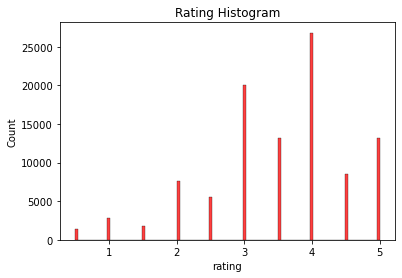

In [40]:
sns.histplot(data['rating'], color='red').set_title('Rating Histogram');
data['rating'].mean()

**Explanation**

By looking at the distribution of ratings, one can notice that they are not normally distributed. Consequently, by applying weights on the mean or a Z-Score, the distribution is drawn towards the mean which is set at 3.5. How the different models apply this affects directly the best/worst performing predictions. 

*Normalization*

The algorithm applies the Z-Score to determine the degree of similarity of a user based on his activity and determines, accordingly who are the most similar users (in terms of the Z-Score) to develop an estimation. In the top performing movies, one can observe that the ratings correspond to movies with a large amount of ratings which are generally concentrated. This allows the algorithm to select among a larger set of users who are the closest neighbors and thus determine efficiently the estimated rating.

The model, nevertheless, provides a poor estimation in cases where there is a larger diversity/opinion for the rating where the Z-Score fails to capture this changing perception by the users.

*Mean Weighted KNN*

This model applies as part of the algorithm the mean rating for each user so as to adjust or create a correction factor when assesing the the similarity of the user. 

As a result of this pondering factor affecting or drawing the similarity towards the user rating mean, we notice that the worst and best performing movies exhibit a large amount of ratings with a varied opinion on the movie (Lord of the Rings: Two Towers appears as both best perfomance and worst performance of the algorithm). 

Consequently, the weight will affect the performance when users show an erratic/varied rating that could lead in certain cases to be drawn towards certain users with whom they are dissimilar.

---

So far we have used different algorithms but we can also change the parameters of the models. For example, the parameter for knn are (https://surprise.readthedocs.io/en/stable/knn_inspired.html):
- k (int) – The (max) number of neighbors to take into account for aggregation (see this note). Default is 40.
- min_k (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- sim_options (dict) – A dictionary of options for the similarity measure. See Similarity measure configuration for accepted options.

The sim_options dictionary admits the following (all optional) keys (https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration):
- 'name': The name of the similarity to use, as defined in the similarities module (https://surprise.readthedocs.io/en/stable/similarities.html#module-surprise.similarities) ('cosine', 'msd', 'pearson' or 'pearson_baseline'). Default is 'MSD'.
- 'user_based': Whether similarities will be computed between users or between items. This has a huge impact on the performance of a prediction algorithm. Default is True.
- 'min_support': The minimum number of common items (when 'user_based' is 'True') or minimum number of common users (when 'user_based' is 'False') for the similarity not to be zero. Simply put, if |Iuv|<min_support then sim(u,v)=0. The same goes for items.
- 'shrinkage': Shrinkage parameter to apply (only relevant for pearson_baseline similarity). Default is 100.


### Exercise 
Create an item based collaborative filtering recommender using a neighbourhood max size of 35 and cosine distance. 

In [83]:
### Developing an item based collaborative filtering method

sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }

algo = KNNBasic(k=35, sim_options=sim_options)

predictions = algo.fit(trainset).test(testset)
rmse(predictions)
mae(predictions);

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9751
MAE:  0.7596


The following function returns the top-N recommendation for each user from a set of predictions (https://github.com/NicolasHug/Surprise).

In [84]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

## Exercise 
Use the above function to get the top 10 recommendations for user with id=1

In [85]:
### Top 10 recomendation movieId for user 1:

dict_pred = get_top_n(predictions, n=10) #List for all users recommended movies

In [86]:
### Obtaining the Title of the movies recommended: 

def find_movies(dictionary, user):
    """ Return the top-N recommended movies for the different users by using the
            following process:
                1. Apply the get_top_n function to extract as a dictionary the 
                    top 10 recommendations
                2. Filter the dictionary to extract the movieId
                3. Apply a for loop to append the corresponding titles of the movies
    
    """
    

    recommendations = dict_pred.get(user) 
    recommendations = [x[0] for x in recommendations] #Spliting to get only the movieId
    
    user_movie = [] 
    for movie in recommendations:
        mov_break = data.loc[data['movieId']==movie]
        mov_break = mov_break.iloc[0]
        mov_break.to_frame()
        mov_break = mov_break.title
        user_movie.append(mov_break)

        
    return user_movie

In [89]:
# Top 10 recommendations for user 1:

find_movies(dict_pred,1)

['Big Trouble in Little China (1986)',
 'Indiana Jones and the Temple of Doom (1984)',
 'Ghostbusters (a.k.a. Ghost Busters) (1984)',
 'Planet of the Apes (1968)',
 "Schindler's List (1993)",
 'E.T. the Extra-Terrestrial (1982)',
 'South Park: Bigger, Longer and Uncut (1999)',
 'James and the Giant Peach (1996)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Being John Malkovich (1999)']

## Optional
Try different algorithms and parameters of the surprise package

In [46]:
### Testing the Support Vector Machine with Cross-Validation (5 folds)
from surprise import SVD
from surprise.model_selection import cross_validate
mod = SVD()
cross_validate(mod, data_surp, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8768  0.8783  0.8725  0.8676  0.8737  0.8738  0.0037  
MAE (testset)     0.6738  0.6745  0.6723  0.6684  0.6682  0.6714  0.0027  
Fit time          6.19    6.09    6.24    6.14    6.00    6.13    0.08    
Test time         0.22    0.22    0.22    0.23    0.43    0.26    0.09    


{'test_rmse': array([0.87676863, 0.87833012, 0.87247348, 0.86761537, 0.87369708]),
 'test_mae': array([0.67381396, 0.67446586, 0.67233818, 0.66843793, 0.66816303]),
 'fit_time': (6.193311929702759,
  6.0890953540802,
  6.238433837890625,
  6.13840126991272,
  5.995733976364136),
 'test_time': (0.2199392318725586,
  0.21779751777648926,
  0.2168586254119873,
  0.22764277458190918,
  0.43497395515441895)}

In [47]:
mod.fit(trainset)
predictions_2 = mod.fit(trainset).test(testset)
rmse(predictions_2)
mae(predictions_2);

RMSE: 0.8697
MAE:  0.6684


In [48]:
df2 = pd.DataFrame(predictions_2, columns=['uid', 'iid', 'rui', 'est', 'details'])
df2['abs_err'] = abs(df2['rui'] - df2['est'])
df2.head()

,uid,iid,rui,est,details,abs_err
0,62,111659,3.5,3.578130,{'was_impossible': False},0.078130
1,573,48774,4.5,4.365074,{'was_impossible': False},0.134926
2,91,2146,2.5,3.228442,{'was_impossible': False},0.728442
3,596,96281,4.0,3.380716,{'was_impossible': False},0.619284
4,580,1198,4.5,3.964984,{'was_impossible': False},0.535016


In [49]:
df2['abs_err'].var()

0.30967088780714647

In [50]:
### Comparing the top_n recomendations with the new model
dict_pred2 = get_top_n(predictions, n=10) #List for all users recommended movies

In [51]:
find_movies(dict_pred2,1)

['Big Trouble in Little China (1986)',
 'Indiana Jones and the Temple of Doom (1984)',
 'Ghostbusters (a.k.a. Ghost Busters) (1984)',
 'Planet of the Apes (1968)',
 "Schindler's List (1993)",
 'E.T. the Extra-Terrestrial (1982)',
 'South Park: Bigger, Longer and Uncut (1999)',
 'James and the Giant Peach (1996)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Being John Malkovich (1999)']

In [52]:
find_movies(dict_pred,1)

['Big Trouble in Little China (1986)',
 'Indiana Jones and the Temple of Doom (1984)',
 'Ghostbusters (a.k.a. Ghost Busters) (1984)',
 'Planet of the Apes (1968)',
 "Schindler's List (1993)",
 'E.T. the Extra-Terrestrial (1982)',
 'South Park: Bigger, Longer and Uncut (1999)',
 'James and the Giant Peach (1996)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Being John Malkovich (1999)']

As We can observe - both models arrive at the same set of movie recommendations for user 1.